In [1]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
import numpy as np
import torch

from deepsvdd.train import TrainerDeepSVDD
from deepsvdd.test import eval
from preprocess import get_mnist

In [2]:
class Args:
    num_epochs=250
    num_epochs_ae=350
    patience=100
    lr=1e-4
    weight_decay=0.5e-6
    weight_decay_ae=0.5e-3
    lr_ae=1e-4
    lr_milestones_ae=[250]
    lr_milestones=[150]
    batch_size=200
    pretrain=True
    latent_dim=32
    anormal_class=5
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataloader_train, dataloader_val, dataloader_test = get_mnist(args)

deep_SVDD = TrainerDeepSVDD(args, dataloader_train, dataloader_val, device)

if args.pretrain:
    deep_SVDD.pretrain()

43663/43663: [===============================>] - ETA 0.4ss
Pretraining Autoencoder... Epoch: 0, Loss: 78.547
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 1, Loss: 16.994
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 2, Loss: 7.832
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 3, Loss: 5.055
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 4, Loss: 3.795
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 5, Loss: 3.085
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 6, Loss: 2.637
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 7, Loss: 2.330
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 8, Loss: 2.106
43663/43663: [===

43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 75, Loss: 0.771
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 76, Loss: 0.770
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 77, Loss: 0.768
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 78, Loss: 0.768
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 79, Loss: 0.763
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 80, Loss: 0.761
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 81, Loss: 0.760
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 82, Loss: 0.756
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 83, Loss: 0.757
43663/4366

43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 149, Loss: 0.682
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 150, Loss: 0.681
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 151, Loss: 0.681
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 152, Loss: 0.679
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 153, Loss: 0.678
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 154, Loss: 0.677
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 155, Loss: 0.677
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 156, Loss: 0.676
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 157, Loss: 0.677
4

43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 223, Loss: 0.644
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 224, Loss: 0.643
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 225, Loss: 0.640
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 226, Loss: 0.641
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 227, Loss: 0.639
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 228, Loss: 0.641
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 229, Loss: 0.638
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 230, Loss: 0.639
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 231, Loss: 0.640
4

43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 297, Loss: 0.620
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 298, Loss: 0.620
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 299, Loss: 0.620
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 300, Loss: 0.620
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 301, Loss: 0.620
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 302, Loss: 0.619
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 303, Loss: 0.620
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 304, Loss: 0.619
43663/43663: [===============================>] - ETA 0.1ss
Pretraining Autoencoder... Epoch: 305, Loss: 0.619
4

In [3]:
deep_SVDD.train()

43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 0, Loss: 1.292
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 0, Loss: 0.357
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 1, Loss: 0.240
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 1, Loss: 0.17
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 2, Loss: 0.141
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 2, Loss: 0.115
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 3, Loss: 0.101
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 3, Loss: 0.0859
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 4, Loss: 0.078
1091

10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 36, Loss: 0.00488
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 37, Loss: 0.005
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 37, Loss: 0.00481
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 38, Loss: 0.005
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 38, Loss: 0.00451
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 39, Loss: 0.005
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 39, Loss: 0.00411
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 40, Loss: 0.004
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 40,

43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 73, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 73, Loss: 0.00085
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 74, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 74, Loss: 0.000698
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 75, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 75, Loss: 0.00118
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 76, Loss: 0.001
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 76, Loss: 0.000608
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 77, Loss: 0.001
10916/10916: [=

43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 110, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 110, Loss: 0.00019
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 111, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 111, Loss: 0.000178
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 112, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 112, Loss: 0.000276
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 113, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 113, Loss: 0.000193
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 114, Loss: 0.000
10916

10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 147, Loss: 0.000103
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 148, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 148, Loss: 0.000104
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 149, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 149, Loss: 8.8e-05
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 150, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 150, Loss: 6.22e-05
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 151, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 151, Loss: 5.9e-05
Wei

43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 185, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 185, Loss: 6.63e-05
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 186, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 186, Loss: 5.46e-05
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 187, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 187, Loss: 5.87e-05
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 188, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 188, Loss: 5.26e-05
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 189, Loss: 0.000
10916/10916: [=====

10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 222, Loss: 4.61e-05
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 223, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 223, Loss: 4.63e-05
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 224, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 224, Loss: 4.55e-05
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 225, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 225, Loss: 4.73e-05
43663/43663: [===============================>] - ETA 0.1ss
Training Deep SVDD... Epoch: 226, Loss: 0.000
10916/10916: [===============================>] - ETA 0.1s
Testing Autoencoder... Epoch: 226, Loss: 5.05e-05
4

In [4]:
import torch

from sklearn.metrics import roc_auc_score

def eval(net, c, dataloader, device):
    """Testing the Deep SVDD model"""

    scores = []
    labels1 = []
    labels2 = []
    net.eval()
    print('Testing...')
    with torch.no_grad():
        for x, y1, y2 in dataloader:
            x = x.float().to(device)
            z = net(x)
            score = torch.sum((z - c) ** 2, dim=1)

            scores.append(score.detach().cpu())
            labels1.append(y1.cpu())
            labels2.append(y2.cpu())
    labels1, labels2, scores = torch.cat(labels1).numpy(), torch.cat(labels2).numpy(), torch.cat(scores).numpy()
    print('ROC AUC score: {:.3f}'.format(roc_auc_score(labels2, scores)))
    return labels1, labels2, scores

labels1, labels2, scores = eval(deep_SVDD.net, deep_SVDD.c, dataloader_test, device)

Testing...
ROC AUC score: 0.699


In [5]:
scores_in = scores[labels2==0]
scores_out = scores[labels2==1]

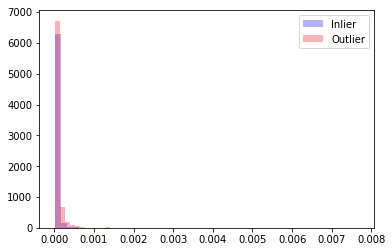

In [10]:
plt.hist(scores_in, bins=50, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=20, color='r', alpha=0.3, density=True, label='Outlier')
plt.legend()